In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import hugs_pipe as hp
import lsst.afw.detection
import lsst.afw.image
import lsst.afw.display
import lsstutils
import lsst.afw.geom as afwGeom
import lsst.daf.persistence

In [2]:
tract = 16010
patch = '0,3'
try:
    config.reset_mask_planes()
except:
    pass
config = hp.Config(tract=tract, patch=patch)
config.randoms_db_fn = '/tigress/jgreco/randoms/randoms-safe-360000.db'
results = hp.run(config, debug_return=True, randoms_only=True)

hugs-pipe: 16010 | 0,3: 05/11 18:45:59 INFO: starting hugs-pipe with config file /home/jgreco/projects/hugs-pipe/hugs_pipe/default_config.yml


INFO:hugs-pipe: 16010 | 0,3:starting hugs-pipe with config file /home/jgreco/projects/hugs-pipe/hugs_pipe/default_config.yml


hugs-pipe: 16010 | 0,3: 05/11 18:46:06 INFO: performing low threshold at 3.0 sigma


INFO:hugs-pipe: 16010 | 0,3:performing low threshold at 3.0 sigma


hugs-pipe: 16010 | 0,3: 05/11 18:46:07 INFO: performing high threshold at 28.0 sigma


INFO:hugs-pipe: 16010 | 0,3:performing high threshold at 28.0 sigma


hugs-pipe: 16010 | 0,3: 05/11 18:46:08 INFO: generating cleaned exposure


INFO:hugs-pipe: 16010 | 0,3:generating cleaned exposure


hugs-pipe: 16010 | 0,3: 05/11 18:46:12 INFO: finding detectable randoms in patch


INFO:hugs-pipe: 16010 | 0,3:finding detectable randoms in patch


hugs-pipe: 16010 | 0,3: 05/11 18:46:27 INFO: task completed in 0.37 min


INFO:hugs-pipe: 16010 | 0,3:task completed in 0.37 min


In [3]:
exp_clean = results.exp_clean
df = results.randoms_results.df

wcs = exp_clean.getWcs()
xy0 = exp_clean.getXY0()
coords = lsstutils.make_afw_coords(df.loc[df['detected']==1, ['ra', 'dec']].values)
pixels = [wcs.skyToPixel(coord) - xy0 for coord in coords]
pixels = [(pix.getX(), pix.getY()) for pix in pixels]
pixels = np.array(pixels)

mask = exp_clean.getMaskedImage().getMask()
mask_arr = hp.randoms.get_mask_array(exp_clean)

img_width = exp_clean.getWidth()
img_height = exp_clean.getHeight()

(0, 4199)

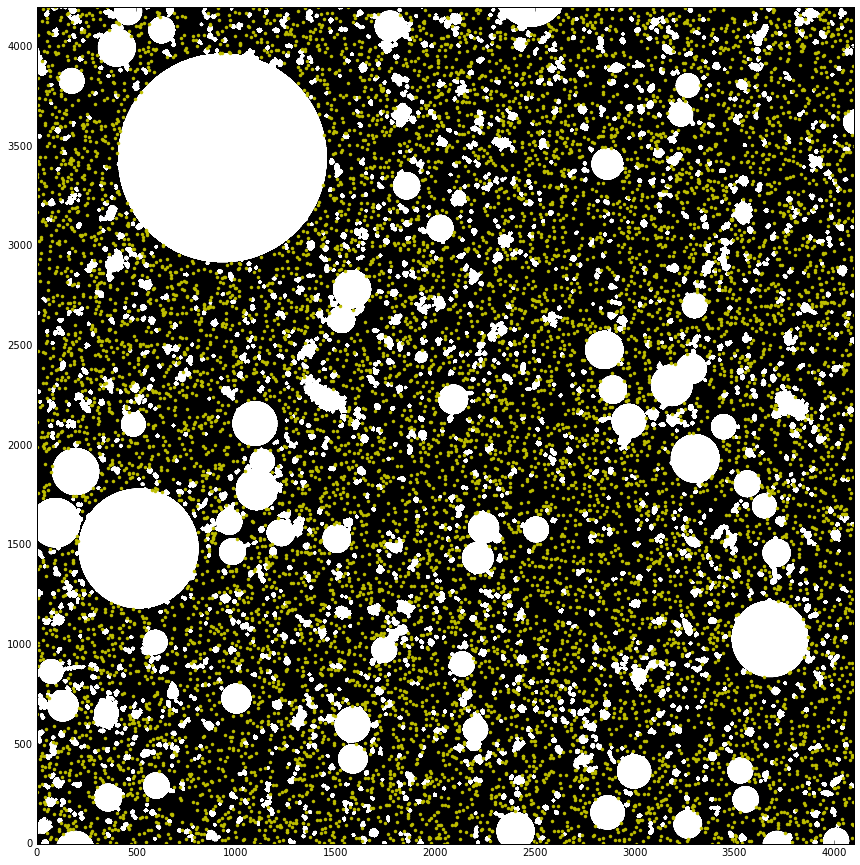

In [4]:
plt.figure(figsize=(15, 15))
plt.imshow(mask_arr, origin='lower', cmap='gray')
plt.plot(pixels[:,0], pixels[:,1], 'y.')
plt.xlim(0, img_width-1)
plt.ylim(0, img_height-1)